# Table of Content
01. Import Libraries
02. Import Data
03. Create and Export Visualizations
- (Q5.6a) What differences can you find in ordering habits of different customer profiles?
- (Q5.6b) What differences can you find in ordering habits of different income?

# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Adjust the setting to view all columns in this notebook
pd.options.display.max_columns = None

# 02. Import Data

In [3]:
# Define the main folder project path
path = r'C:\Users\saich\Desktop\CareerFoundry\Data Immersion\Achievement 4 Python Fundamentals for Data Analysts\04-2023 Instacart Basket Analysis (github)'

In [4]:
# Import 'orders_products_all_flagged' data set from 'Prepared Data' folder
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all_flagged.pkl'))

In [5]:
ords_prods_all.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_order_interval,order_frequency_flag,gender,state,age,date_joined,dependant_counts,family_status,income,_merge,region,customer_profile,income_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regular busy,Regular busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Big family,Low income


In [6]:
ords_prods_all.shape

(32399732, 34)

# 03. Create and Export Visualizations

### (Q5.6a) What differences can you find in ordering habits of different customer profiles?
- 01. Bar chart: no of orders vs customer_profile
- 02. Bar chart: no of users vs customer_profile
- 03. Bar chart: orders/user vs customer_profile
- 04. Bar chart: prices mean vs customer_profile
- 05. Percentage stacked bar chart: price_range vs customer_profile
- 06. Bar chart: days_since_prior_order mean vs customer_profile
- 07. Bar chart: department orders vs customer_profile
- 08. Bar chart: department orders for big family
- 09. Bar chart: department orders for senior citizen
- 10. Bar chart: department orders for single adult
- 11. Bar chart: department orders for small family
- 12. Bar chart: department orders for young parent
- 13. Bar chart: department orders vs customer_profile in Midwest
- 14. Bar chart: department orders vs customer_profile in Northeast
- 15. Bar chart: department orders vs customer_profile in South
- 16. Bar chart: department orders vs customer_profile in West

#### Q5.6a_01. Bar chart: no of orders vs customer_profile

In [7]:
# Find the number of orders across 'customer_profile'
ords_prods_all['customer_profile'].value_counts(dropna = False).sort_index()

Big family        4838435
Senior citizen    8573751
Single adult      5976558
Small family      7497037
Young parent      5513951
Name: customer_profile, dtype: int64

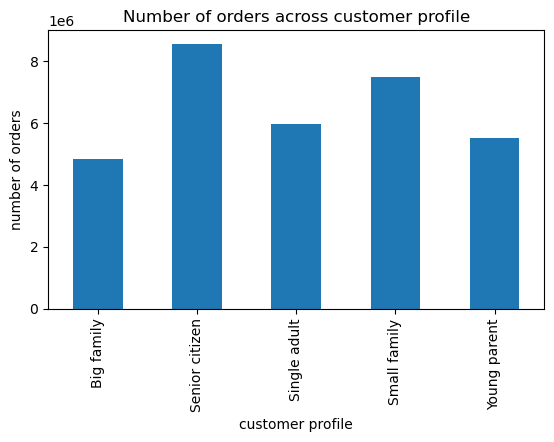

In [8]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_cust_profile = ords_prods_all['customer_profile'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across customer profile', xlabel = 'customer profile', ylabel = 'number of orders')
plt.subplots_adjust(bottom = 0.30)

In [9]:
# Export bar_order_count_vs_cust_profile
bar_order_count_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_01 (bar) order_count vs cust_profile.png'))

#### Q5.6a_02. Bar chart: no of users vs customer_profile

In [10]:
# Find the number of users acorss 'customer_profile'
ords_prods_all.groupby('customer_profile')['user_id'].nunique()

customer_profile
Big family        37181
Senior citizen    54729
Single adult      37944
Small family      57790
Young parent      18565
Name: user_id, dtype: int64

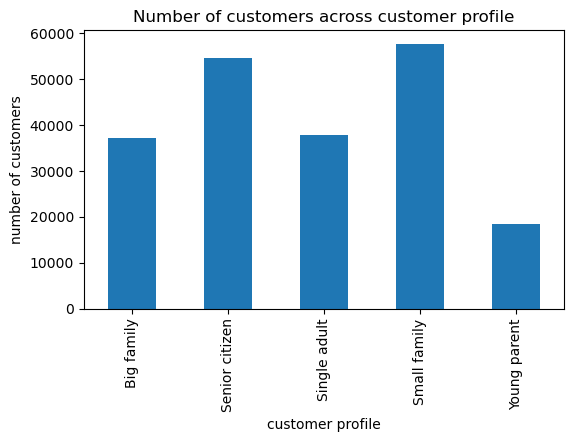

In [11]:
# Create a bar chart based on the frequency table above
bar_user_count_vs_cust_profile = ords_prods_all.groupby('customer_profile')['user_id'].nunique().plot.bar(title = 'Number of customers across customer profile', xlabel = 'customer profile', ylabel = 'number of customers')
plt.subplots_adjust(bottom = 0.30, left = 0.15)

In [12]:
# Export bar_user_count_vs_cust_profile
bar_user_count_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_02 (bar) user_count vs cust_profile.png'))

#### Q5.6a_03. Bar chart: orders/user vs customer_profile

In [13]:
# Find the number of orders per user across 'customer_profile'
grouped_cust_profile = ords_prods_all.groupby('customer_profile')
pivot_order_per_user_vs_cust_profile = grouped_cust_profile['order_id'].count() / grouped_cust_profile['user_id'].nunique()
pivot_order_per_user_vs_cust_profile

customer_profile
Big family        130.131922
Senior citizen    156.658280
Single adult      157.509962
Small family      129.728967
Young parent      297.007864
dtype: float64

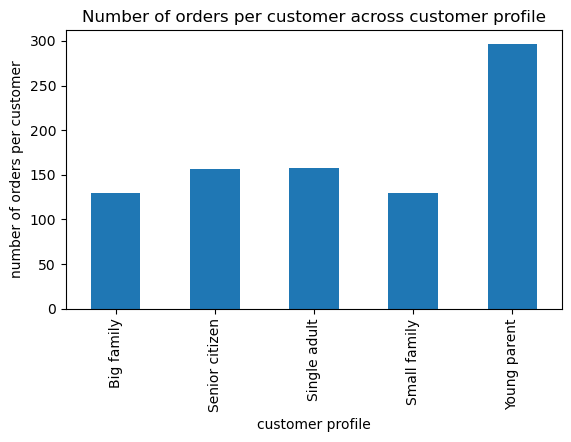

In [14]:
# Create a bar chart based on the frequency table above
bar_order_per_user_vs_cust_profile = pivot_order_per_user_vs_cust_profile.plot.bar(title = 'Number of orders per customer across customer profile', xlabel = 'customer profile', ylabel = 'number of orders per customer')
plt.subplots_adjust(bottom = 0.30)

In [15]:
# Export bar_order_per_user_vs_cust_profile
bar_order_per_user_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_03 (bar) order_per_user vs cust_profile.png'))

#### Q5.6a_04. Bar chart: prices mean vs customer_profile

In [16]:
# Find the average order price across 'customer_profile'
ords_prods_all.groupby('customer_profile')['prices'].mean()

customer_profile
Big family        7.774557
Senior citizen    7.796546
Single adult      7.785729
Small family      7.769742
Young parent      7.831386
Name: prices, dtype: float32

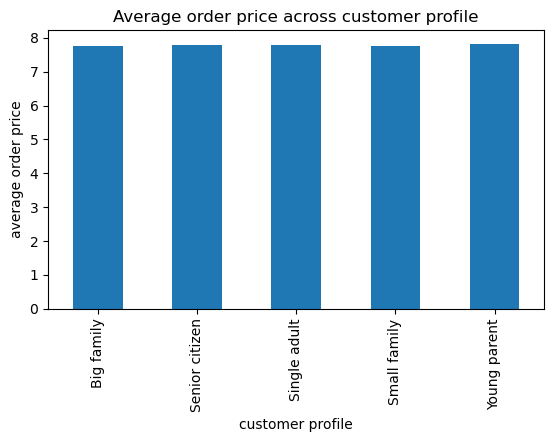

In [17]:
# Create a bar chart based on the frequency table above
bar_price_mean_vs_cust_profile = ords_prods_all.groupby('customer_profile')['prices'].mean().plot.bar(title = 'Average order price across customer profile', xlabel = 'customer profile', ylabel = 'average order price')
plt.subplots_adjust(bottom = 0.30)

In [18]:
# Export bar_price_mean_vs_cust_profile
bar_price_mean_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_04 (bar) price_mean vs cust_profile.png'))

#### Q5.6a_05. Percentage stacked bar chart: price_range vs customer_profile

In [19]:
# Find the number of orders of different 'price_range' across different 'customer_profile'
ct_price_range_vs_customer_profile = pd.crosstab(ords_prods_all['customer_profile'], ords_prods_all['price_range'])
ct_price_range_vs_customer_profile

price_range,High-range product,Low-range product,Mid-range product
customer_profile,,,
Big family,61783,1526310,3250342
Senior citizen,110617,2678156,5784978
Single adult,73684,1869187,4033687
Small family,95148,2365140,5036749
Young parent,71319,1687528,3755104


In [20]:
# Convert the values in ct_price_range_vs_customer_profile into a percentage of each row
ct_percent_price_range_vs_customer_profile = ct_price_range_vs_customer_profile.div(ct_price_range_vs_customer_profile.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_customer_profile

price_range,High-range product,Low-range product,Mid-range product
customer_profile,,,
Big family,0.012769,0.315455,0.671775
Senior citizen,0.012902,0.312367,0.674731
Single adult,0.012329,0.312753,0.674918
Small family,0.012691,0.315477,0.671832
Young parent,0.012934,0.306047,0.681019


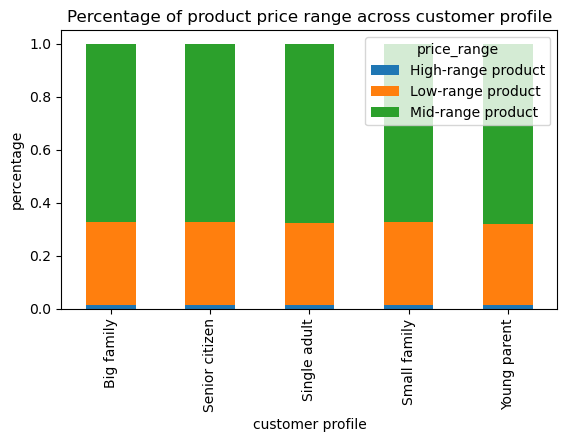

In [21]:
# Create the percentage bar chart of price_range vs customer_profile 
percent_bar_price_range_vs_customer_profile = ct_percent_price_range_vs_customer_profile.plot.bar(stacked = True, title = 'Percentage of product price range across customer profile', xlabel = 'customer profile', ylabel = 'percentage')
plt.subplots_adjust(bottom = 0.30)

In [22]:
# Export percent_bar_price_range_vs_customer_profile
percent_bar_price_range_vs_customer_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_05 (percent bar) price_range vs customer_profile.png'))

#### Q5.6a_06. Bar chart: days_since_prior_order mean vs customer_profile

In [23]:
# Find the average 'days_since_prior_order' across 'customer_profile'
ords_prods_all.groupby('customer_profile')['days_since_prior_order'].mean()

customer_profile
Big family        11.876058
Senior citizen    11.078526
Single adult      11.086243
Small family      11.885429
Young parent       9.472975
Name: days_since_prior_order, dtype: float32

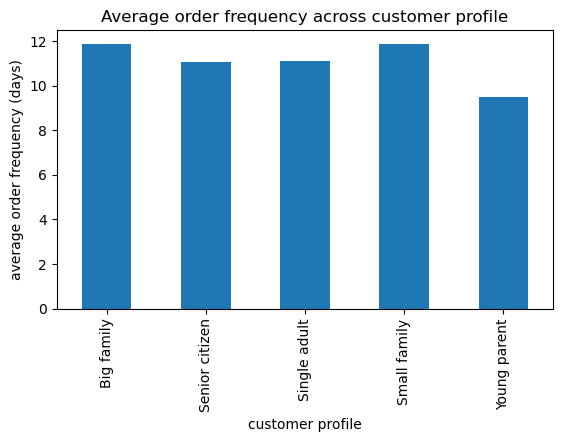

In [24]:
# Create a bar chart based on the frequency table above
bar_days_since_prior_order_mean_vs_cust_profile = ords_prods_all.groupby('customer_profile')['days_since_prior_order'].mean().plot.bar(title = 'Average order frequency across customer profile', xlabel = 'customer profile', ylabel = 'average order frequency (days)')
plt.subplots_adjust(bottom = 0.30)

In [25]:
# Export bar_days_since_prior_order_mean_vs_cust_profile
bar_days_since_prior_order_mean_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_06 (bar) days_since_prior_order_mean vs cust_profile.png'))

#### Q5.6a_07. Bar chart: department orders vs customer_profile

In [26]:
# Find the number of orders in different departments across 'customer_profile'
ct_dept_orders_vs_cust_profile = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['customer_profile'])
ct_dept_orders_vs_cust_profile

customer_profile,Big family,Senior citizen,Single adult,Small family,Young parent
department_id,,,,,
1,333209,593669,408827,512173,386865
2,5365,9425,6884,8170,6447
3,171997,309522,218384,267762,204763
4,1437396,2513763,1752420,2214565,1561147
5,30604,39036,29354,43427,11275
6,41559,70774,50219,64103,42598
7,432105,714832,498015,678975,364196
8,16694,26286,17559,24081,13096
9,124264,228935,158959,190246,164223


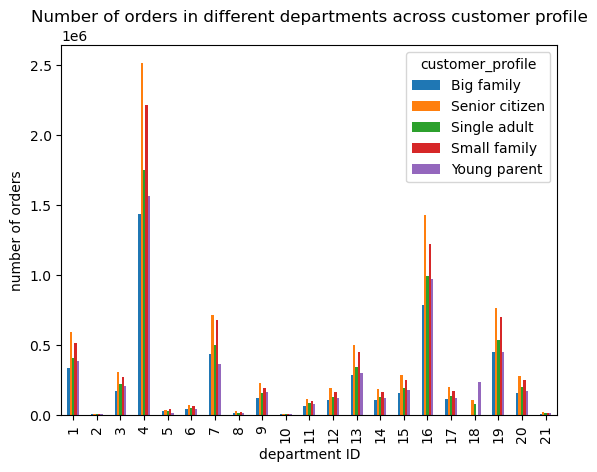

In [27]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_cust_profile = ct_dept_orders_vs_cust_profile.plot.bar(title = 'Number of orders in different departments across customer profile', xlabel = 'department ID', ylabel = 'number of orders')

In [28]:
# Export bar_dept_orders_vs_cust_profile
bar_dept_orders_vs_cust_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_07 (bar) dept_orders vs cust_profile.png'))

#### Q5.6a_08. Bar chart: department orders for big family

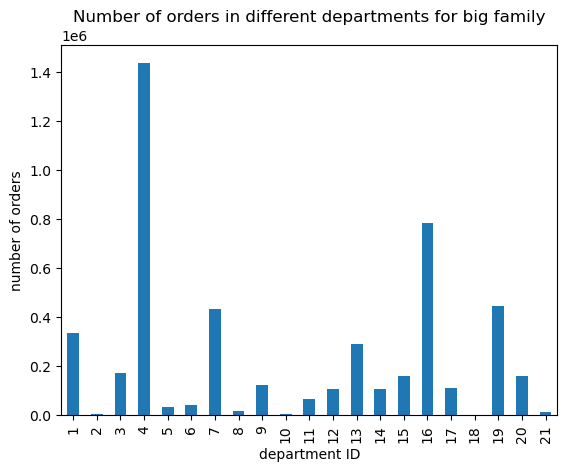

In [29]:
# Create a bar chart based on the first column (big family) of 'ct_dept_orders_vs_cust_profile' above
bar_dept_orders_big_family = ct_dept_orders_vs_cust_profile.iloc[:, 0].plot.bar(title = 'Number of orders in different departments for big family', xlabel = 'department ID', ylabel = 'number of orders')

In [30]:
# Export bar_dept_orders_big_family
bar_dept_orders_big_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_08 (bar) dept_orders_big_family.png'))

#### Q5.6a_09. Bar chart: department orders for big family

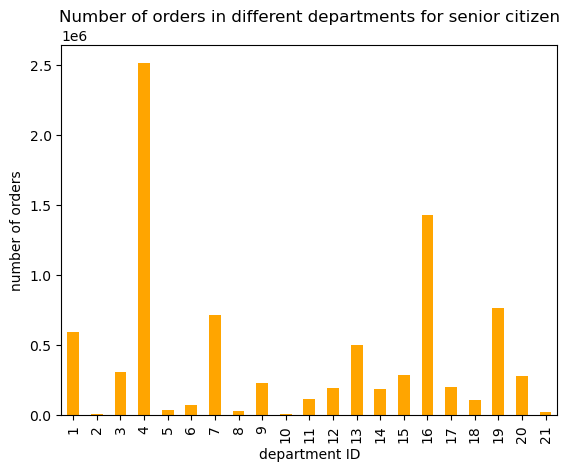

In [31]:
# Create a bar chart based on the second column (senior citizen) of 'ct_dept_orders_vs_cust_profile' above
bar_dept_orders_senior_citizen = ct_dept_orders_vs_cust_profile.iloc[:, 1].plot.bar(title = 'Number of orders in different departments for senior citizen', xlabel = 'department ID', ylabel = 'number of orders', color = ['orange'])

In [32]:
# Export bar_dept_orders_senior_citizen
bar_dept_orders_senior_citizen.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_09 (bar) dept_orders_senior_citizen.png'))

#### Q5.6a_10. Bar chart: department orders for single adult

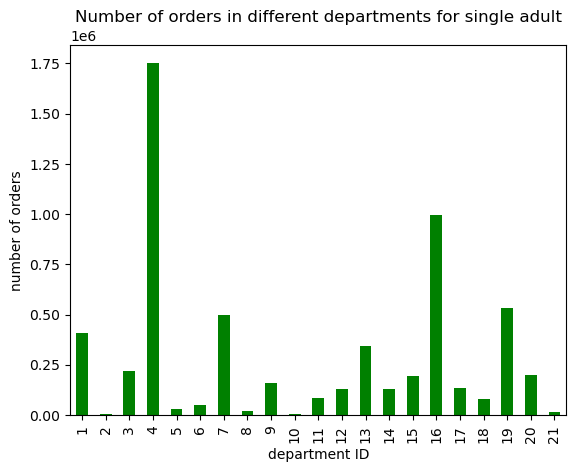

In [33]:
# Create a bar chart based on the third column (single adult) of 'ct_dept_orders_vs_cust_profile' above
bar_dept_orders_single_adult = ct_dept_orders_vs_cust_profile.iloc[:, 2].plot.bar(title = 'Number of orders in different departments for single adult', xlabel = 'department ID', ylabel = 'number of orders', color = ['green'])

In [34]:
# Export bar_dept_orders_single_adult
bar_dept_orders_single_adult.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_10 (bar) dept_orders_single_adult.png'))

#### Q5.6a_11. Bar chart: department orders for small family

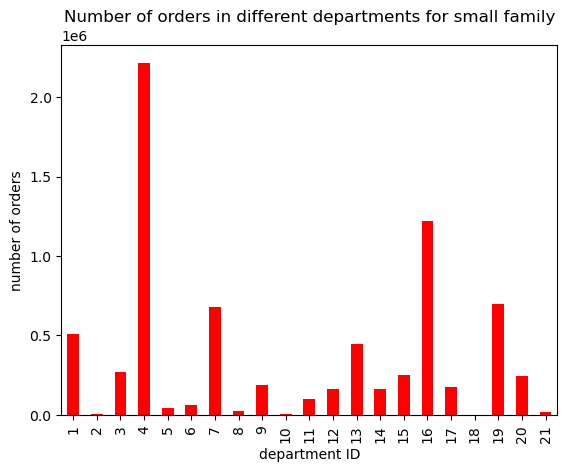

In [35]:
# Create a bar chart based on the forth column (small family) of 'ct_dept_orders_vs_cust_profile' above
bar_dept_orders_small_family = ct_dept_orders_vs_cust_profile.iloc[:, 3].plot.bar(title = 'Number of orders in different departments for small family', xlabel = 'department ID', ylabel = 'number of orders', color = ['red'])

In [36]:
# Export bar_dept_orders_small_family
bar_dept_orders_small_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_11 (bar) dept_orders_small_family.png'))

#### Q5.6a_12. Bar chart: department orders for young parent

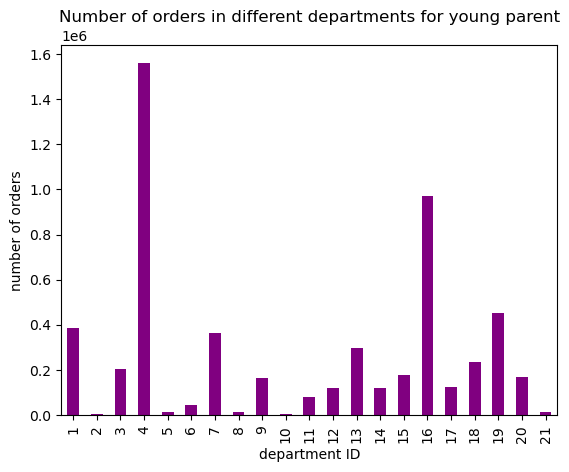

In [37]:
# Create a bar chart based on the fifth column (young parent) of 'ct_dept_orders_vs_cust_profile' above
bar_dept_orders_young_parent = ct_dept_orders_vs_cust_profile.iloc[:, 4].plot.bar(title = 'Number of orders in different departments for young parent', xlabel = 'department ID', ylabel = 'number of orders', color = ['purple'])

In [38]:
# Export bar_dept_orders_young_parent
bar_dept_orders_young_parent.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_12 (bar) dept_orders_young_parent.png'))

#### Q5.6a_13. Bar chart: department orders vs customer_profile in Midwest

In [39]:
# Find the number of orders in different departments across 'customer_profile' in Midwest
ords_prods_all_midwest = ords_prods_all.loc[ords_prods_all['region'] == 'Midwest'][['department_id', 'customer_profile', 'income_flag']]
ct_dept_orders_vs_cust_profile_midwest = pd.crosstab(ords_prods_all_midwest['department_id'], ords_prods_all_midwest['customer_profile'])
ct_dept_orders_vs_cust_profile_midwest

customer_profile,Big family,Senior citizen,Single adult,Small family,Young parent
department_id,,,,,
1,79774,136839,96225,120221,91037
2,1315,2189,1529,1928,1459
3,40240,70895,52259,63562,46913
4,341696,591677,411831,522034,360699
5,7284,9508,7446,8919,3029
6,10038,16565,11808,15172,10153
7,99662,165226,115948,159283,85455
8,3932,5485,4290,5761,2887
9,30250,53004,38492,45034,36989


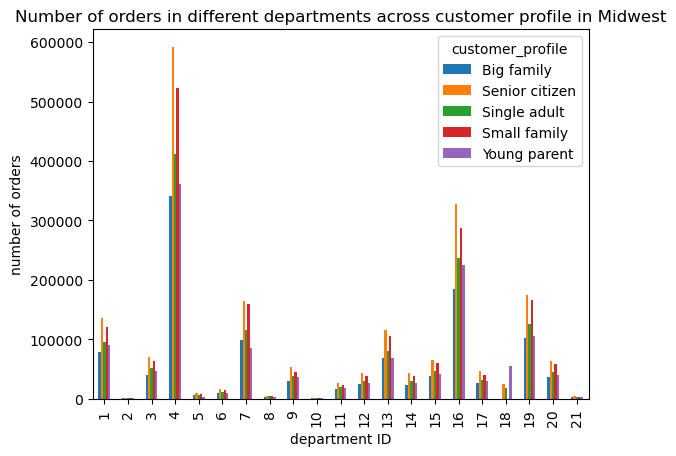

In [40]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_cust_profile_midwest = ct_dept_orders_vs_cust_profile_midwest.plot.bar(title = 'Number of orders in different departments across customer profile in Midwest', xlabel = 'department ID', ylabel = 'number of orders')

In [41]:
# Export bar_dept_orders_vs_cust_profile_midwest
bar_dept_orders_vs_cust_profile_midwest.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_13 (bar) dept_orders vs cust_profile_midwest.png'), bbox_inches = 'tight')

#### Q5.6a_14. Bar chart: department orders vs customer_profile in Northeast

In [42]:
# Find the number of orders in different departments across 'customer_profile' in Midwest in Northeast
ords_prods_all_northeast = ords_prods_all.loc[ords_prods_all['region'] == 'Northeast'][['department_id', 'customer_profile', 'income_flag']]
ct_dept_orders_vs_cust_profile_northeast = pd.crosstab(ords_prods_all_northeast['department_id'], ords_prods_all_northeast['customer_profile'])
ct_dept_orders_vs_cust_profile_northeast

customer_profile,Big family,Senior citizen,Single adult,Small family,Young parent
department_id,,,,,
1,56986,106128,69913,89645,68246
2,882,1892,1273,1394,1144
3,29351,56994,38106,46866,37282
4,250040,450422,297150,388833,279394
5,4493,6069,6205,7804,1971
6,7344,12480,8700,10727,7640
7,75452,131239,86412,123104,67211
8,2820,5800,3311,4010,2660
9,21247,41494,27203,32689,29183


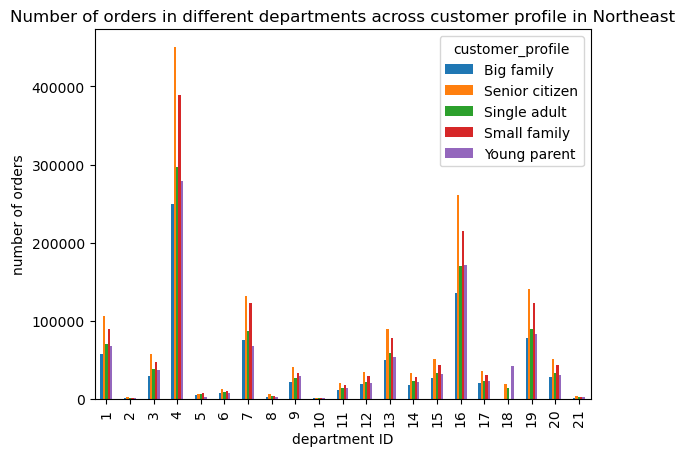

In [43]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_cust_profile_northeast = ct_dept_orders_vs_cust_profile_northeast.plot.bar(title = 'Number of orders in different departments across customer profile in Northeast', xlabel = 'department ID', ylabel = 'number of orders')

In [44]:
# Export bar_dept_orders_vs_cust_profile_northeast
bar_dept_orders_vs_cust_profile_northeast.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_14 (bar) dept_orders vs cust_profile_northeast.png'), bbox_inches = 'tight')

#### Q5.6a_15. Bar chart: department orders vs customer_profile in South

In [45]:
# Find the number of orders in different departments across 'customer_profile' in Midwest in South
ords_prods_all_south = ords_prods_all.loc[ords_prods_all['region'] == 'South'][['department_id', 'customer_profile', 'income_flag']]
ct_dept_orders_vs_cust_profile_south = pd.crosstab(ords_prods_all_south['department_id'], ords_prods_all_south['customer_profile'])
ct_dept_orders_vs_cust_profile_south

customer_profile,Big family,Senior citizen,Single adult,Small family,Young parent
department_id,,,,,
1,110330,197584,138708,171229,130049
2,1790,3123,2308,2723,2268
3,57861,102376,72573,87584,68421
4,474644,828108,586090,746379,525330
5,11160,14079,8934,13953,3498
6,13696,23391,16659,21359,14037
7,146214,237869,170474,222271,122112
8,5308,8471,5271,7509,4710
9,40638,75646,52468,62910,55782


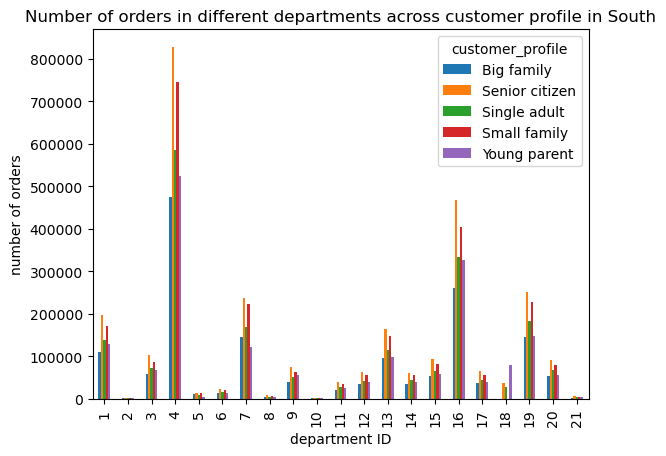

In [46]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_cust_profile_south = ct_dept_orders_vs_cust_profile_south.plot.bar(title = 'Number of orders in different departments across customer profile in South', xlabel = 'department ID', ylabel = 'number of orders')

In [47]:
# Export bar_dept_orders_vs_cust_profile_south
bar_dept_orders_vs_cust_profile_south.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_15 (bar) dept_orders vs cust_profile_south.png'), bbox_inches = 'tight')

#### Q5.6a_16. Bar chart: department orders vs customer_profile in West

In [48]:
# Find the number of orders in different departments across 'customer_profile' in Midwest in West
ords_prods_all_west = ords_prods_all.loc[ords_prods_all['region'] == 'West'][['department_id', 'customer_profile', 'income_flag']]
ct_dept_orders_vs_cust_profile_west = pd.crosstab(ords_prods_all_west['department_id'], ords_prods_all_west['customer_profile'])
ct_dept_orders_vs_cust_profile_west

customer_profile,Big family,Senior citizen,Single adult,Small family,Young parent
department_id,,,,,
1,86119,153118,103981,131078,97533
2,1378,2221,1774,2125,1576
3,44545,79257,55446,69750,52147
4,371016,643556,457349,557319,395724
5,7667,9380,6769,12751,2777
6,10481,18338,13052,16845,10768
7,110777,180498,125181,174317,89418
8,4634,6530,4687,6801,2839
9,32129,58791,40796,49613,42269


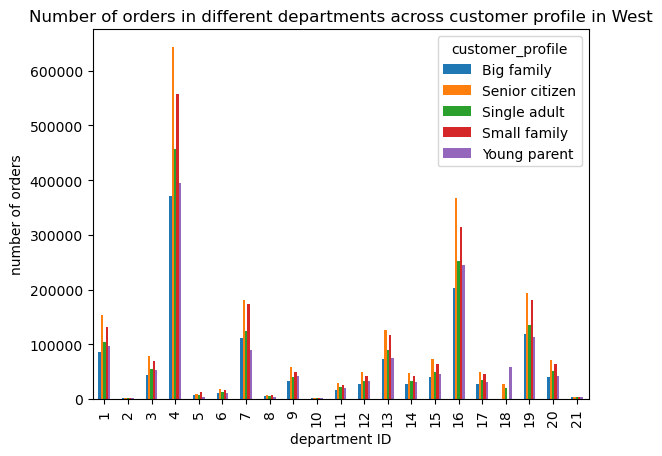

In [49]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_cust_profile_west = ct_dept_orders_vs_cust_profile_west.plot.bar(title = 'Number of orders in different departments across customer profile in West', xlabel = 'department ID', ylabel = 'number of orders')

In [50]:
# Export bar_dept_orders_vs_cust_profile_west
bar_dept_orders_vs_cust_profile_west.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6a', 'Q5.6a_16 (bar) dept_orders vs cust_profile_west.png'), bbox_inches = 'tight')

### (Q5.6b) What differences can you find in ordering habits of different income?
- 01. Bar chart: no of orders vs income_flag
- 02. Bar chart: no of users vs income_flag
- 03. Bar chart: orders/user vs income_flag
- 04. Bar chart: prices mean vs income_flag
- 05. Percentage stacked bar chart: price_range vs income_flag
- 06. Bar chart: days_since_prior_order mean vs income_flag
- 07. Bar chart: department orders vs income_flag
- 08. Bar chart: department orders for high income
- 09. Bar chart: department orders for low income
- 10. Bar chart: department orders for medium income
- 11. Bar chart: department orders vs income_flag in Midwest
- 12. Bar chart: department orders vs income_flag in Northeast
- 13. Bar chart: department orders vs income_flag in South
- 14. Bar chart: department orders vs income_flag in West

#### Q5.6b_01. Bar chart: no of orders vs income_flag

In [51]:
# Find the number of orders across 'income_flag'
ords_prods_all['income_flag'].value_counts(dropna = False).sort_index()

High income       9566652
Low income        6160689
Medium income    16672391
Name: income_flag, dtype: int64

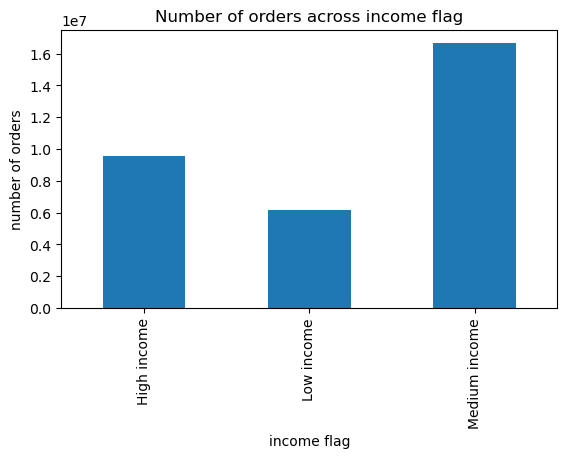

In [52]:
# Create a bar chart based on the frequency table above
bar_order_count_vs_income_flag = ords_prods_all['income_flag'].value_counts(dropna = False).sort_index().plot.bar(title = 'Number of orders across income flag', xlabel = 'income flag', ylabel = 'number of orders')
plt.subplots_adjust(bottom = 0.30)

In [53]:
# Export bar_order_count_vs_income_flag
bar_order_count_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_01 (bar) order_count vs income_flag.png'))

#### Q5.6b_02. Bar chart: no of users vs income_flag

In [54]:
# Find the number of users acorss 'income_flag'
ords_prods_all.groupby('income_flag')['user_id'].nunique()

income_flag
High income      56296
Low income       51784
Medium income    98129
Name: user_id, dtype: int64

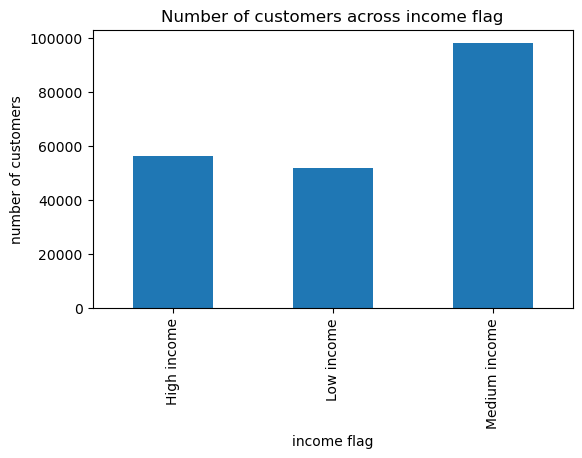

In [55]:
# Create a bar chart based on the frequency table above
bar_user_count_vs_income_flag = ords_prods_all.groupby('income_flag')['user_id'].nunique().plot.bar(title = 'Number of customers across income flag', xlabel = 'income flag', ylabel = 'number of customers')
plt.subplots_adjust(bottom = 0.30, left = 0.15)

In [56]:
# Export bar_user_count_vs_income_flag
bar_user_count_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_02 (bar) user_count vs income_flag.png'))

#### Q5.6b_03. Bar chart: orders/user vs income_flag

In [57]:
# Find the number of orders per user across 'income_flag'
grouped_income_flag = ords_prods_all.groupby('income_flag')
pivot_order_per_user_vs_income_flag = grouped_income_flag['order_id'].count() / grouped_income_flag['user_id'].nunique()
pivot_order_per_user_vs_income_flag

income_flag
High income      169.934844
Low income       118.968967
Medium income    169.902791
dtype: float64

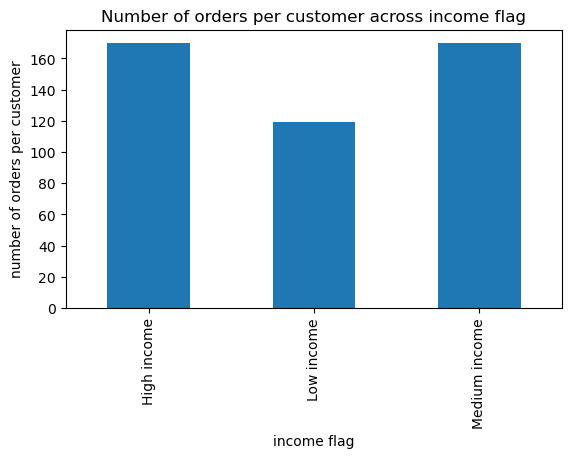

In [58]:
# Create a bar chart based on the frequency table above
bar_order_per_user_vs_income_flag = pivot_order_per_user_vs_income_flag.plot.bar(title = 'Number of orders per customer across income flag', xlabel = 'income flag', ylabel = 'number of orders per customer')
plt.subplots_adjust(bottom = 0.30)

In [59]:
# Export bar_order_per_user_vs_income_flag
bar_order_per_user_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_03 (bar) order_per_user vs income_flag.png'))

#### Q5.6b_04. Bar chart: prices mean vs income_flag

In [60]:
# Find the average order price across 'income_flag'
ords_prods_all.groupby('income_flag')['prices'].mean()

income_flag
High income      7.957993
Low income       7.072333
Medium income    7.960725
Name: prices, dtype: float32

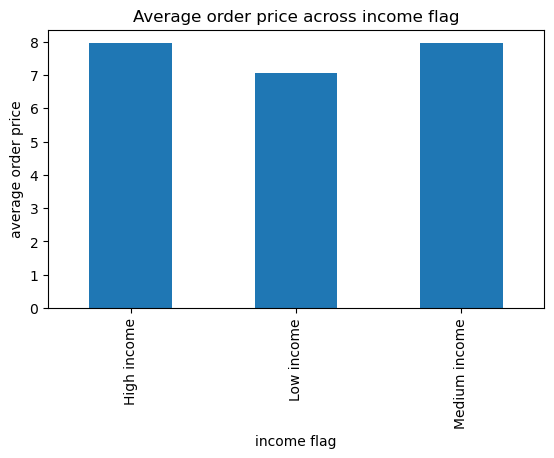

In [61]:
# Create a bar chart based on the frequency table above
bar_price_mean_vs_income_flag = ords_prods_all.groupby('income_flag')['prices'].mean().plot.bar(title = 'Average order price across income flag', xlabel = 'income flag', ylabel = 'average order price')
plt.subplots_adjust(bottom = 0.30)

In [62]:
# Export bar_price_mean_vs_income_flag
bar_price_mean_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_04 (bar) price_mean vs income_flag.png'))

#### Q5.6b_05. Percentage stacked bar chart: price_range vs income_flag

In [63]:
# Find the number of orders of different 'price_range' across different 'income_flag'
ct_price_range_vs_income_flag = pd.crosstab(ords_prods_all['income_flag'], ords_prods_all['price_range'])
ct_price_range_vs_income_flag

price_range,High-range product,Low-range product,Mid-range product
income_flag,,,
High income,133920,2843177,6589555
Low income,47701,2338339,3774649
Medium income,230930,4944805,11496656


In [64]:
# Convert the values in ct_price_range_vs_income_flag into a percentage of each row
ct_percent_price_range_vs_income_flag = ct_price_range_vs_income_flag.div(ct_price_range_vs_income_flag.sum(axis = 1), axis = 0)
ct_percent_price_range_vs_income_flag

price_range,High-range product,Low-range product,Mid-range product
income_flag,,,
High income,0.013999,0.297197,0.688805
Low income,0.007743,0.379558,0.612699
Medium income,0.013851,0.296586,0.689563


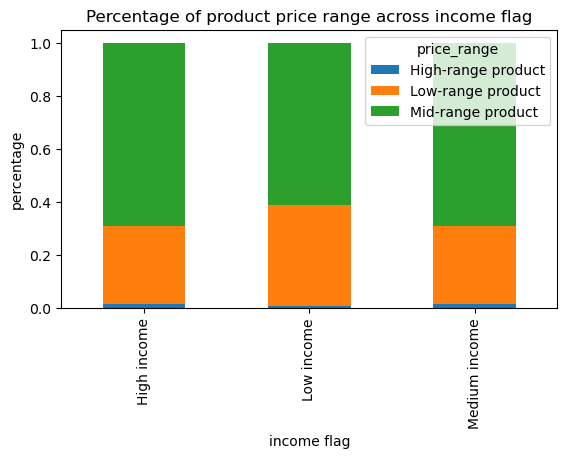

In [65]:
# Create the percentage bar chart of price_range vs income_flag 
bar_percent_price_range_vs_income_flag = ct_percent_price_range_vs_income_flag.plot.bar(stacked = True, title = 'Percentage of product price range across income flag', xlabel = 'income flag', ylabel = 'percentage')
plt.subplots_adjust(bottom = 0.30)

In [66]:
# Export bar_percent_price_range_vs_income_flag
bar_percent_price_range_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_05 (percent bar) price_range vs income_flag.png'))

#### Q5.6b_06. Bar chart: days_since_prior_order mean vs income_flag

In [67]:
# Find the average 'days_since_prior_order' across 'income_flag'
ords_prods_all.groupby('income_flag')['days_since_prior_order'].mean()

income_flag
High income      11.029098
Low income       11.427092
Medium income    11.028396
Name: days_since_prior_order, dtype: float32

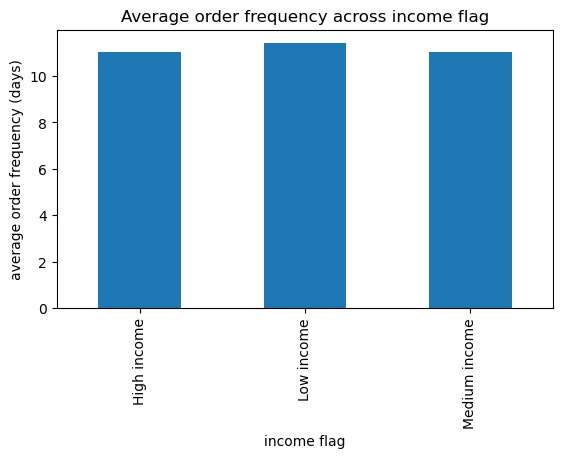

In [68]:
# Create a bar chart based on the frequency table above
bar_days_since_prior_order_mean_vs_income_flag = ords_prods_all.groupby('income_flag')['days_since_prior_order'].mean().plot.bar(title = 'Average order frequency across income flag', xlabel = 'income flag', ylabel = 'average order frequency (days)')
plt.subplots_adjust(bottom = 0.30)

In [69]:
# Export bar_days_since_prior_order_mean_vs_income_flag
bar_days_since_prior_order_mean_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_06 (bar) days_since_prior_order_mean vs income_flag.png'))

#### Q5.6b_07. Bar chart: department orders vs income_flag

In [70]:
# Find the number of orders in different departments across 'income_flag'
ct_dept_orders_vs_income_flag = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['income_flag'])
ct_dept_orders_vs_income_flag

income_flag,High income,Low income,Medium income
department_id,,,
1,672191,407248,1155304
2,10803,7021,18467
3,356861,204635,610932
4,2836588,1623058,5019645
5,48918,31206,73572
6,81154,44336,143763
7,760514,627805,1299804
8,31061,16497,50158
9,265936,136492,464199


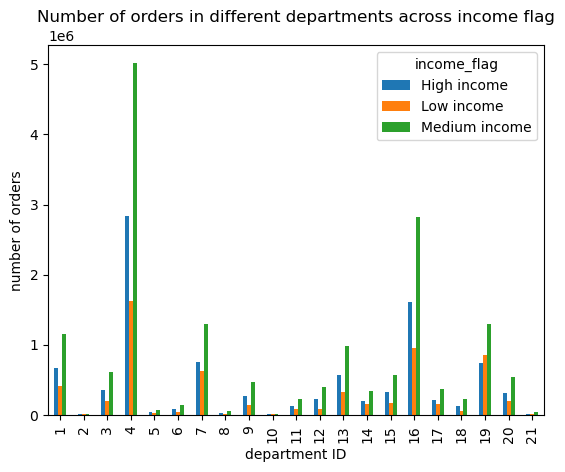

In [71]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_income_flag = ct_dept_orders_vs_income_flag.plot.bar(title = 'Number of orders in different departments across income flag', xlabel = 'department ID', ylabel = 'number of orders')

In [72]:
# Export bar_dept_orders_vs_income_flag
bar_dept_orders_vs_income_flag.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_07 (bar) dept_orders vs income_flag.png'))

#### Q5.6b_08. Bar chart: department orders for high income

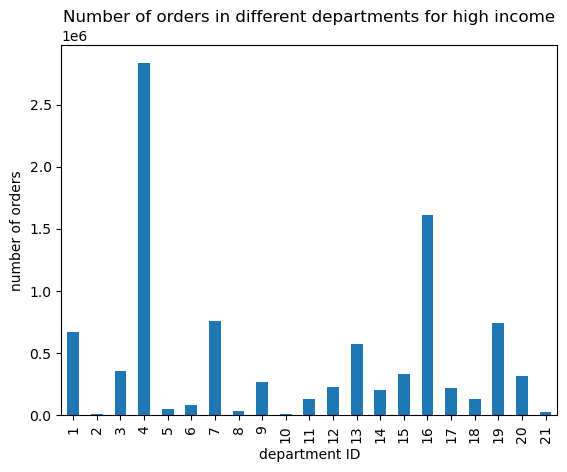

In [73]:
# Create a bar chart based on the first column (high income) of 'ct_dept_orders_vs_income_flag' above
bar_dept_orders_high_income = ct_dept_orders_vs_income_flag.iloc[:, 0].plot.bar(title = 'Number of orders in different departments for high income', xlabel = 'department ID', ylabel = 'number of orders')

In [74]:
# Export bar_dept_orders_high_income
bar_dept_orders_high_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_08 (bar) dept_orders_high_income.png'))

#### Q5.6b_09. Bar chart: department orders for low income

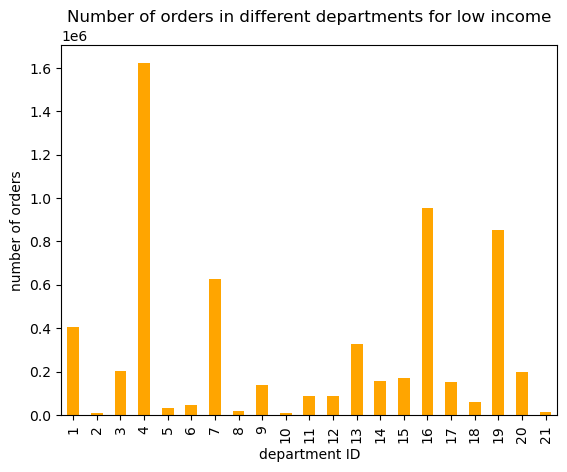

In [75]:
# Create a bar chart based on the second column (low income) of 'ct_dept_orders_vs_income_flag' above
bar_dept_orders_low_income = ct_dept_orders_vs_income_flag.iloc[:, 1].plot.bar(title = 'Number of orders in different departments for low income', xlabel = 'department ID', ylabel = 'number of orders', color = ['orange'])

In [76]:
# Export bar_dept_orders_low_income
bar_dept_orders_low_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_09 (bar) dept_orders_low_income.png'))

#### Q5.6b_10. Bar chart: department orders for medium income

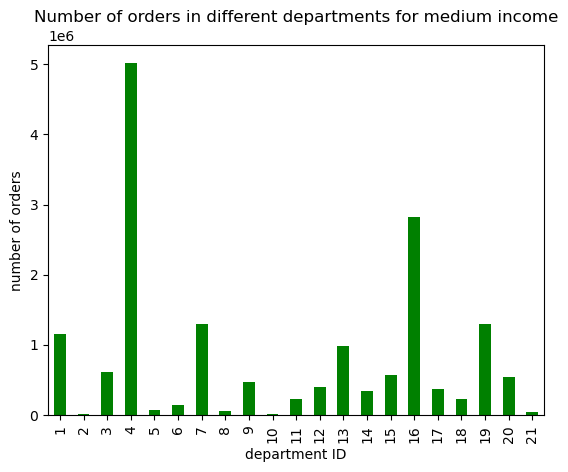

In [77]:
# Create a bar chart based on the third column (medium income) of 'ct_dept_orders_vs_income_flag' above
bar_dept_orders_medium_income = ct_dept_orders_vs_income_flag.iloc[:, 2].plot.bar(title = 'Number of orders in different departments for medium income', xlabel = 'department ID', ylabel = 'number of orders', color = ['green'])

In [78]:
# Export bar_dept_orders_medium_income
bar_dept_orders_medium_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_10 (bar) dept_orders_medium_income.png'))

#### Q5.6b_11. Bar chart: department orders vs income_flag in Midwest

In [79]:
# Find the number of orders in different departments across 'income_flag' in Midwest
ct_dept_orders_vs_income_flag_midwest = pd.crosstab(ords_prods_all_midwest['department_id'], ords_prods_all_midwest['income_flag'])
ct_dept_orders_vs_income_flag_midwest

income_flag,High income,Low income,Medium income
department_id,,,
1,159787,95544,268765
2,2638,1594,4188
3,84902,47875,141092
4,677308,375018,1175611
5,11282,7365,17539
6,19536,10196,34004
7,181761,143068,300745
8,6978,3978,11399
9,63162,31917,108690


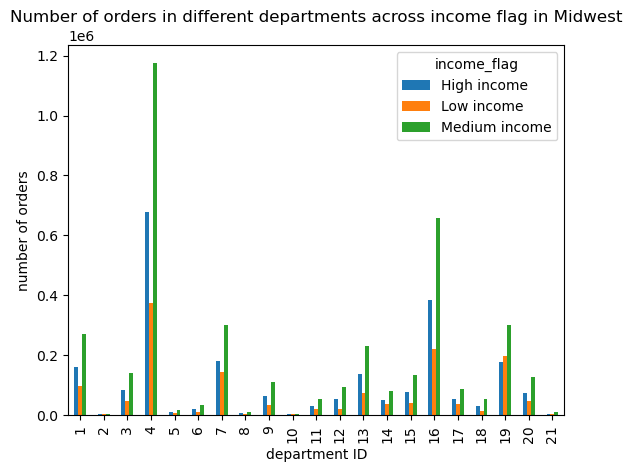

In [80]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_income_flag_midwest = ct_dept_orders_vs_income_flag_midwest.plot.bar(title = 'Number of orders in different departments across income flag in Midwest', xlabel = 'department ID', ylabel = 'number of orders')

In [81]:
# Export bar_dept_orders_vs_income_flag_midwest
bar_dept_orders_vs_income_flag_midwest.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_11 (bar) dept_orders vs income_flag_midwest.png'), bbox_inches = 'tight')

#### Q5.6b_12. Bar chart: department orders vs income_flag in Northeast

In [82]:
# Find the number of orders in different departments across 'income_flag' in Northeast
ct_dept_orders_vs_income_flag_northeast = pd.crosstab(ords_prods_all_northeast['department_id'], ords_prods_all_northeast['income_flag'])
ct_dept_orders_vs_income_flag_northeast

income_flag,High income,Low income,Medium income
department_id,,,
1,117663,70289,202966
2,2020,1252,3313
3,63568,36552,108479
4,500904,282941,881994
5,9737,5006,11799
6,14191,8271,24429
7,140380,111720,231318
8,6248,2692,9661
9,47752,24091,79973


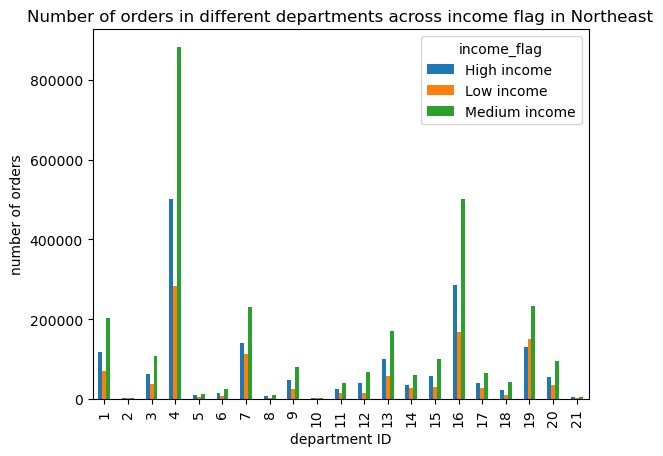

In [83]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_income_flag_northeast = ct_dept_orders_vs_income_flag_northeast.plot.bar(title = 'Number of orders in different departments across income flag in Northeast', xlabel = 'department ID', ylabel = 'number of orders')

In [84]:
# Export bar_dept_orders_vs_income_flag_northeast
bar_dept_orders_vs_income_flag_northeast.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_12 (bar) dept_orders vs income_flag_northeast.png'), bbox_inches = 'tight')

#### Q5.6b_13. Bar chart: department orders vs income_flag in South

In [85]:
# Find the number of orders in different departments across 'income_flag' in South
ct_dept_orders_vs_income_flag_south = pd.crosstab(ords_prods_all_south['department_id'], ords_prods_all_south['income_flag'])
ct_dept_orders_vs_income_flag_south

income_flag,High income,Low income,Medium income
department_id,,,
1,223158,137053,387689
2,3552,2280,6380
3,117501,68234,203080
4,934765,554448,1671338
5,16220,10388,25016
6,26862,14859,47421
7,246674,212634,439632
8,9646,5472,16151
9,87969,45651,153824


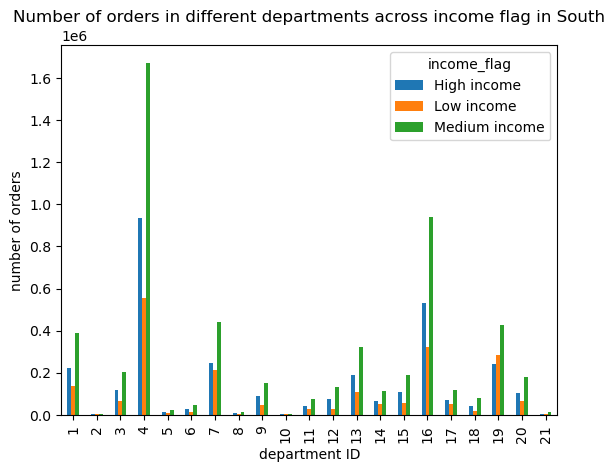

In [86]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_income_flag_south = ct_dept_orders_vs_income_flag_south.plot.bar(title = 'Number of orders in different departments across income flag in South', xlabel = 'department ID', ylabel = 'number of orders')

In [87]:
# Export bar_dept_orders_vs_income_flag_south
bar_dept_orders_vs_income_flag_south.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_13 (bar) dept_orders vs income_flag_south.png'), bbox_inches = 'tight')

#### Q5.6b_14. Bar chart: department orders vs income_flag in West

In [88]:
# Find the number of orders in different departments across 'income_flag' in West
ct_dept_orders_vs_income_flag_west = pd.crosstab(ords_prods_all_west['department_id'], ords_prods_all_west['income_flag'])
ct_dept_orders_vs_income_flag_west

income_flag,High income,Low income,Medium income
department_id,,,
1,171583,104362,295884
2,2593,1895,4586
3,90890,51974,158281
4,723611,410651,1290702
5,11679,8447,19218
6,20565,11010,37909
7,191699,160383,328109
8,8189,4355,12947
9,67053,34833,121712


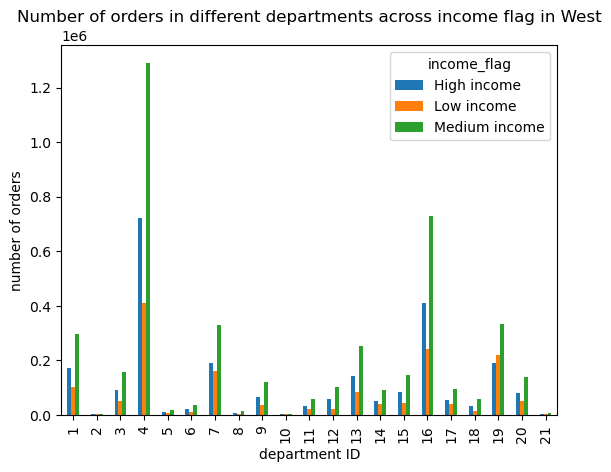

In [89]:
# Create a bar chart based on the frequency table above
bar_dept_orders_vs_income_flag_west = ct_dept_orders_vs_income_flag_west.plot.bar(title = 'Number of orders in different departments across income flag in West', xlabel = 'department ID', ylabel = 'number of orders')

In [90]:
# Export bar_dept_orders_vs_income_flag_west
bar_dept_orders_vs_income_flag_west.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Q5.6b', 'Q5.6b_14 (bar) dept_orders vs income_flag_west.png'), bbox_inches = 'tight')